In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv("vol_nn_output.csv")
dfcon = pd.read_csv("con_lr_output.csv")
dfdif = pd.read_csv('dif_svm_output.csv')
bipolar = pd.read_csv('bipolar_test.csv')
df = df.merge(dfcon, how='left', on='subject_key')
df = df.merge(dfdif, how='left', on='subject_key')
df = df.merge(bipolar, how='left', on='subject_key')
df

,subject_key,vol_nn_0,vol_nn_1,con_lr_0,con_lr_1,dif_svm,bipolar
0,23517009,-0.316192,0.713964,0.172823,0.827177,0.477126,1
1,23517011,-2.937996,3.217842,0.244663,0.755337,0.932783,1
2,23517014,-0.140047,0.552598,0.373722,0.626278,-0.123715,1
3,23517015,1.956815,-1.530902,0.598025,0.401975,0.211958,1
4,23517026,-1.297705,1.664142,0.386321,0.613679,-0.363654,1
5,23517029,-1.007534,1.394926,0.351597,0.648403,-0.247717,1
6,23517034,-2.856398,3.165958,0.254987,0.745013,0.865675,1
7,23517046,1.141321,-0.763570,0.322384,0.677616,0.197408,1
8,23517058,-0.051041,0.416458,0.318858,0.681142,0.939081,1
9,23517081,-0.995228,1.299799,0.465812,0.534188,0.487220,1


# Hard voting ensemble

In [22]:
df1 = df.copy()
# df1['vote_bipolar'] = np.nan
df1['vol'] = np.sign(df1.vol_nn_1 - df1.vol_nn_0)
df1['con'] = np.sign(df1.con_lr_1 - df1.con_lr_0)
df1['dif'] = np.sign(df1.dif_svm)
df1['vote'] = np.sign(df1.vol+df1.con+df1.dif)
for i in range(0,38):
    if df1.loc[i, 'vote'] > 0:
        df1.loc[i, 'vote'] = 1
    elif df1.loc[i, 'vote'] < 0:
        df1.loc[i, 'vote'] = 0
df1['misclassified'] = np.nan
for i in range(0,38):
    if df1.loc[i, 'vote'] != df1.loc[i, 'bipolar']:
        df1.loc[i, 'misclassified'] = 1
    elif df1.loc[i, 'vote'] == df1.loc[i, 'bipolar']:
        df1.loc[i, 'misclassified'] = 0
np.nanmean(df1.misclassified)

0.10526315789473684

In [23]:
df1

,subject_key,vol_nn_0,vol_nn_1,con_lr_0,con_lr_1,dif_svm,bipolar,vol,con,dif,vote,misclassified
0,23517009,-0.316192,0.713964,0.172823,0.827177,0.477126,1,1.0,1.0,1.0,1.0,0.0
1,23517011,-2.937996,3.217842,0.244663,0.755337,0.932783,1,1.0,1.0,1.0,1.0,0.0
2,23517014,-0.140047,0.552598,0.373722,0.626278,-0.123715,1,1.0,1.0,-1.0,1.0,0.0
3,23517015,1.956815,-1.530902,0.598025,0.401975,0.211958,1,-1.0,-1.0,1.0,0.0,1.0
4,23517026,-1.297705,1.664142,0.386321,0.613679,-0.363654,1,1.0,1.0,-1.0,1.0,0.0
5,23517029,-1.007534,1.394926,0.351597,0.648403,-0.247717,1,1.0,1.0,-1.0,1.0,0.0
6,23517034,-2.856398,3.165958,0.254987,0.745013,0.865675,1,1.0,1.0,1.0,1.0,0.0
7,23517046,1.141321,-0.763570,0.322384,0.677616,0.197408,1,-1.0,1.0,1.0,1.0,0.0
8,23517058,-0.051041,0.416458,0.318858,0.681142,0.939081,1,1.0,1.0,1.0,1.0,0.0
9,23517081,-0.995228,1.299799,0.465812,0.534188,0.487220,1,1.0,1.0,1.0,1.0,0.0


In [24]:
# Correlations between the 3 models' predictions
preds = pd.DataFrame(columns=['vol', 'con', 'dif'])
preds.vol = df1.vol
preds.con = df1.con
preds.dif = df1.dif
corr = preds.corr()
corr

,vol,con,dif
vol,1.000000,0.47194,0.161111
con,0.471940,1.00000,0.168550
dif,0.161111,0.16855,1.000000


# Pre-soft voting processing

In [25]:
df.var()

subject_key    59465.107397
vol_nn_0           5.450823
vol_nn_1           5.168805
con_lr_0           0.025248
con_lr_1           0.025248
dif_svm            0.325608
bipolar            0.253912
dtype: float64

### Standardize the models' votes to have 1 standard deviation; weight by performance on validation set

In [181]:
df2 = df.copy() # df2 will contain standardized votes
nn_mean = np.nanmean(np.concatenate((df.vol_nn_0.to_numpy(), df.vol_nn_1.to_numpy())))
nn_std = np.nanstd(np.concatenate((df.vol_nn_0.to_numpy(), df.vol_nn_1.to_numpy())))
lr_mean = np.nanmean(np.concatenate((df.con_lr_0.to_numpy(), df.con_lr_1.to_numpy())))
lr_std = np.nanstd(np.concatenate((df.con_lr_0.to_numpy(), df.con_lr_1.to_numpy())))
svm_mean = np.nanmean(df.dif_svm.to_numpy())
svm_std = np.nanstd(df.dif_svm.to_numpy())

for col in ['vol_nn_0','vol_nn_1']:
    df2[col] = (df2[col] - nn_mean) / df2[col].std() * 0.767
for col in ['con_lr_0','con_lr_1']:
    df2[col] = (df2[col] - 0.5) / df2[col].std() * 0.733
for col in ['dif_svm']:
    df2[col] = (df2[col]) / df2[col].std() * 0.7

# Soft Voting

### Soft voting with neural network (volumetric), logistic regression (connectivity), and SVM (diffusion)

In [183]:
df3 = df2.copy()
df3['total_votes_0'] = df3['vol_nn_0'] + df3['con_lr_0'] - df3['dif_svm']
df3['total_votes_1'] = df3['vol_nn_1'] + df3['con_lr_1'] + df3['dif_svm']

In [184]:
df3['vote_bipolar'] = np.nan
for i in range(0,38):
    if df3.loc[i, 'total_votes_0'] > df3.loc[i, 'total_votes_1']:
        df3.loc[i, 'vote_bipolar'] = 0
    elif df3.loc[i, 'total_votes_1'] > df3.loc[i, 'total_votes_0']:
        df3.loc[i, 'vote_bipolar'] = 1
df3['misclassified'] = np.nan
for i in range(0,38):
    if df3.loc[i, 'vote_bipolar'] != df3.loc[i, 'bipolar']  and np.isnan(df3.loc[i, 'vote_bipolar']) == False:
        df3.loc[i, 'misclassified'] = 1
    elif df3.loc[i, 'vote_bipolar'] == df3.loc[i, 'bipolar']:
        df3.loc[i, 'misclassified'] = 0
np.nanmean(df3.misclassified) # misclassification rate

0.23684210526315788

In [172]:
df3

,subject_key,vol_nn_0,vol_nn_1,con_lr_0,con_lr_1,dif_svm,bipolar,total_votes_0,total_votes_1,vote_bipolar,misclassified
0,23517009,-3.389095,-3.132785,-1.509294,1.509294,0.585307,1,-5.483696,-1.038185,1.0,0.0
1,23517011,-4.250415,-2.288064,-1.177889,1.177889,1.144278,1,-6.572581,0.034102,1.0,0.0
2,23517014,-3.331227,-3.187225,-0.582532,0.582532,-0.151766,1,-3.761994,-2.756458,1.0,0.0
3,23517015,-2.642362,-3.890125,0.452197,-0.452197,0.260016,1,-2.450182,-4.082306,0.0,1.0
4,23517026,-3.711543,-2.812228,-0.524408,0.524408,-0.446107,1,-3.789844,-2.733927,1.0,0.0
5,23517029,-3.616216,-2.903053,-0.684592,0.684592,-0.303883,1,-3.996926,-2.522343,1.0,0.0
6,23517034,-4.223608,-2.305568,-1.130264,1.130264,1.061954,1,-6.415826,-0.113350,1.0,0.0
7,23517046,-2.910270,-3.631254,-0.819355,0.819355,0.242167,1,-3.971792,-2.569732,1.0,0.0
8,23517058,-3.301987,-3.233154,-0.835620,0.835620,1.152004,1,-5.289612,-1.245529,1.0,0.0
9,23517081,-3.612173,-2.935145,-0.157710,0.157710,0.597690,1,-4.367572,-2.179746,1.0,0.0


# Metrics

### Soft voting metrics

In [114]:
predicted = np.array(df3.vote_bipolar)
actual = np.array(df3.bipolar)
predicted, actual

(array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
        1., 0., 0., 0.]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [115]:
results = np.empty(len(predicted)).tolist()
for i in range(0, len(predicted)):
    if predicted[i]==1 and actual[i]==1:
        results[i] = 'tp'
    if predicted[i]==0 and actual[i]==1:
        results[i] = 'fn'
    if predicted[i]==1 and actual[i]==0:
        results[i] = 'fp'
    if predicted[i]==0 and actual[i]==0:
        results[i] = 'tn'
np.array(results)

array(['tp', 'tp', 'tp', 'fn', 'tp', 'tp', 'tp', 'tp', 'tp', 'tp', 'tp',
       'tp', 'fn', 'tp', 'tp', 'tp', 'fn', 'tp', 'tp', 'tp', 'tp', 'tn',
       'tn', 'tn', 'tn', 'fp', 'fp', 'tn', 'fp', 'fp', 'tn', 'fp', 'tn',
       'tn', 'fp', 'tn', 'tn', 'tn'], dtype='<U2')

In [116]:
tp = results.count('tp')
fp = results.count('fp')
tn = results.count('tn')
fn = results.count('fn')
print('Sensitivity: ' + str(tp/(tp+fn)))
print('Specificity: ' + str(tn/(tn+fp)))
print('PPV: ' + str(tp/(tp+fp)))
print('NPV: ' + str(tn/(tn+fn)))

Sensitivity: 0.8571428571428571
Specificity: 0.6470588235294118
PPV: 0.75
NPV: 0.7857142857142857


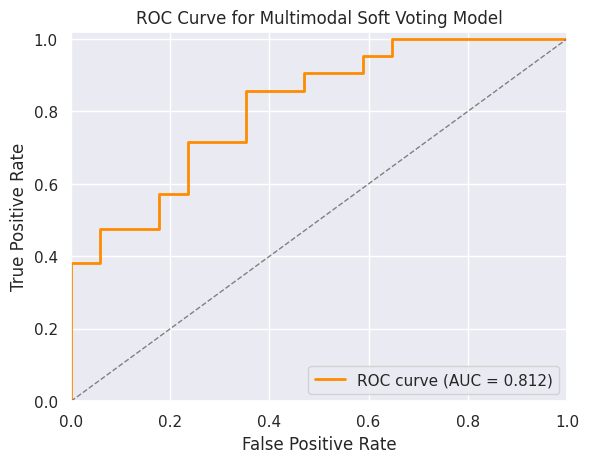

In [117]:
from dython.model_utils import metric_graph
import seaborn as sns

vote1v0 = df3.total_votes_1 - df3.total_votes_0 # votes for class 1 minus votes for class 0

sns.set(style="darkgrid", font_scale=1)
metric_graph(actual, vote1v0, metric='roc', fmt='.3f', title='ROC Curve for Multimodal Soft Voting Model',
             legend='lower right', eopt=False)
plt.show()

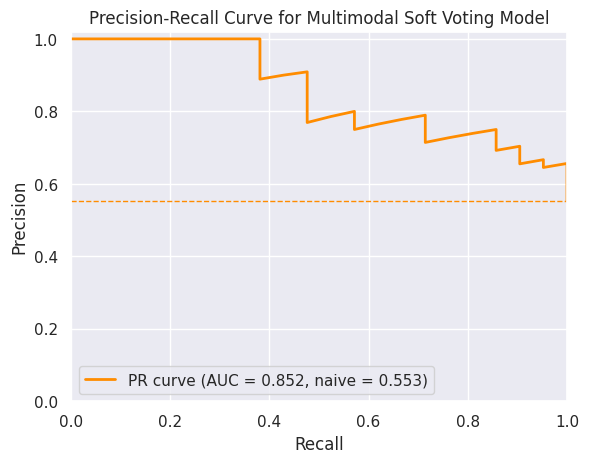

In [118]:
metric_graph(actual, vote1v0, metric='pr', fmt='.3f', title='Precision-Recall Curve for Multimodal Soft Voting Model',
             legend='lower left', eopt=False) # naive precision/AUC is proportion of bipolar in data.
# precision=PPV, recall=sensitivity
plt.show()

In [120]:
p = metric_graph(actual, vote1v0, metric='pr', plot=False)['0']['eopt']['y']
r = metric_graph(actual, vote1v0, metric='pr', plot=False)['0']['eopt']['x']
F1 = 2*p*r/(p+r)
F1 # F1 score (harmonic mean of precision and recall):

0.7999999999999999

### Hard voting metrics

In [121]:
predicted = np.array(df1.vote)
actual = np.array(df1.bipolar)
predicted, actual

(array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0.]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [122]:
results = np.empty(len(predicted)).tolist()
for i in range(0, len(predicted)):
    if predicted[i]==1 and actual[i]==1:
        results[i] = 'tp'
    if predicted[i]==0 and actual[i]==1:
        results[i] = 'fn'
    if predicted[i]==1 and actual[i]==0:
        results[i] = 'fp'
    if predicted[i]==0 and actual[i]==0:
        results[i] = 'tn'
np.array(results)

array(['tp', 'tp', 'tp', 'fn', 'tp', 'tp', 'tp', 'tp', 'tp', 'tp', 'tp',
       'tp', 'tp', 'tp', 'tp', 'tp', 'fn', 'tp', 'tp', 'tp', 'tp', 'tn',
       'tn', 'tn', 'tn', 'tn', 'tn', 'tn', 'tn', 'tn', 'tn', 'fp', 'tn',
       'tn', 'fp', 'tn', 'tn', 'tn'], dtype='<U2')

In [123]:
tp = results.count('tp')
fp = results.count('fp')
tn = results.count('tn')
fn = results.count('fn')
print('Sensitivity: ' + str(tp/(tp+fn)))
print('Specificity: ' + str(tn/(tn+fp)))
print('PPV: ' + str(tp/(tp+fp)))
print('NPV: ' + str(tn/(tn+fn)))

Sensitivity: 0.9047619047619048
Specificity: 0.8823529411764706
PPV: 0.9047619047619048
NPV: 0.8823529411764706


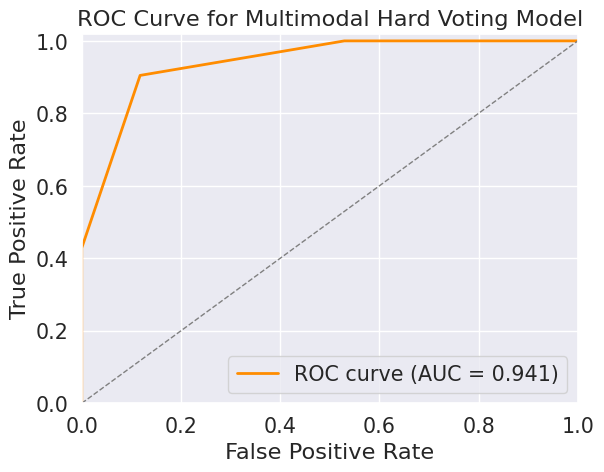

In [124]:
from dython.model_utils import metric_graph
import seaborn as sns

vote1v0 = df1.vol+df1.con+df1.dif # number of votes for class 1 minus number of votes for class 0

sns.set(style="darkgrid", font_scale=1.35)
metric_graph(actual, vote1v0, metric='roc', fmt='.3f', title='ROC Curve for Multimodal Hard Voting Model',
             legend='lower right', eopt=False)
plt.show()

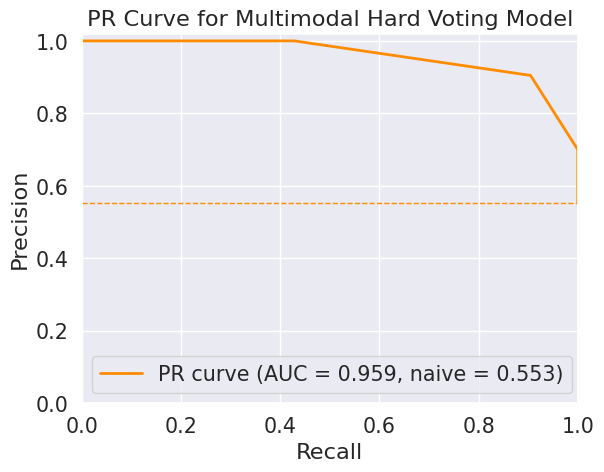

In [125]:
metric_graph(actual, vote1v0, metric='pr', fmt='.3f', title='PR Curve for Multimodal Hard Voting Model',
             legend='lower left', eopt=False) # naive precision/AUC is proportion of bipolar in data.
# precision=PPV, recall=sensitivity
plt.show()

In [126]:
p = metric_graph(actual, vote1v0, metric='pr', plot=False)['0']['eopt']['y']
r = metric_graph(actual, vote1v0, metric='pr', plot=False)['0']['eopt']['x']
F1 = 2*p*r/(p+r)
F1 # F1 score (harmonic mean of precision and recall):

0.9047619047619048

# Model importances: Voting with only 2 models

#### Only volumetric and connectivity

In [127]:
df4 = df2.copy()
df4['total_votes_0'] = df4['vol_nn_0'] + df4['con_lr_0']
df4['total_votes_1'] = df4['vol_nn_1'] + df4['con_lr_1']

In [128]:
df4['vote_bipolar'] = np.nan
for i in range(0,38):
    if df4.loc[i, 'total_votes_0'] > df4.loc[i, 'total_votes_1']:
        df4.loc[i, 'vote_bipolar'] = 0
    elif df4.loc[i, 'total_votes_1'] > df4.loc[i, 'total_votes_0']:
        df4.loc[i, 'vote_bipolar'] = 1
df4['misclassified'] = np.nan
for i in range(0,38):
    if df4.loc[i, 'vote_bipolar'] != df4.loc[i, 'bipolar']  and np.isnan(df4.loc[i, 'vote_bipolar']) == False:
        df4.loc[i, 'misclassified'] = 1
    elif df4.loc[i, 'vote_bipolar'] == df4.loc[i, 'bipolar']:
        df4.loc[i, 'misclassified'] = 0
np.nanmean(df4.misclassified) # misclassification rate

0.2631578947368421

In [129]:
predicted = np.array(df4.vote_bipolar)
actual = np.array(df4.bipolar)
results = np.empty(len(predicted)).tolist()
for i in range(0, len(predicted)):
    if predicted[i]==1 and actual[i]==1:
        results[i] = 'tp'
    if predicted[i]==0 and actual[i]==1:
        results[i] = 'fn'
    if predicted[i]==1 and actual[i]==0:
        results[i] = 'fp'
    if predicted[i]==0 and actual[i]==0:
        results[i] = 'tn'
tp = results.count('tp')
fp = results.count('fp')
tn = results.count('tn')
fn = results.count('fn')
print('Sensitivity: ' + str(tp/(tp+fn)))
print('Specificity: ' + str(tn/(tn+fp)))
print('PPV: ' + str(tp/(tp+fp)))
print('NPV: ' + str(tn/(tn+fn)))

Sensitivity: 0.7619047619047619
Specificity: 0.7058823529411765
PPV: 0.7619047619047619
NPV: 0.7058823529411765


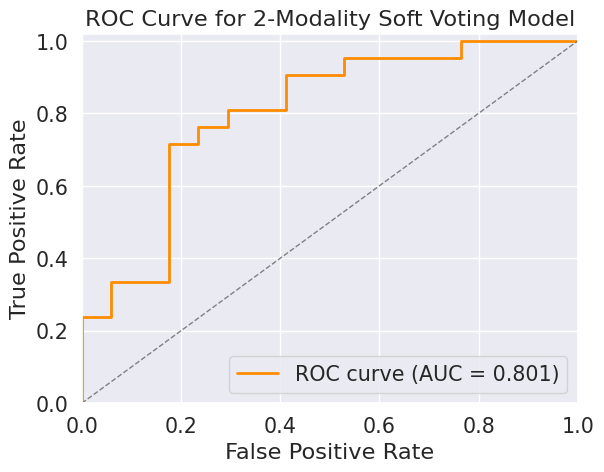

In [130]:
from dython.model_utils import metric_graph
import seaborn as sns

vote1v0 = df4.total_votes_1 - df4.total_votes_0 # number of votes for class 1 minus number of votes for class 0

sns.set(style="darkgrid", font_scale=1.35)
metric_graph(actual, vote1v0, metric='roc', fmt='.3f', title='ROC Curve for 2-Modality Soft Voting Model',
             legend='lower right', eopt=False)
plt.show()

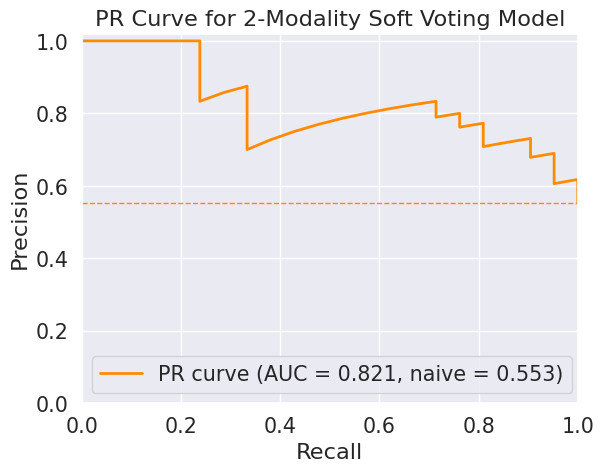

In [131]:
metric_graph(actual, vote1v0, metric='pr', fmt='.3f', title='PR Curve for 2-Modality Soft Voting Model',
             legend='lower left', eopt=False) # naive precision/AUC is proportion of bipolar in data.
# precision=PPV, recall=sensitivity
plt.show()

In [132]:
p = metric_graph(actual, vote1v0, metric='pr', plot=False)['0']['eopt']['y']
r = metric_graph(actual, vote1v0, metric='pr', plot=False)['0']['eopt']['x']
F1 = 2*p*r/(p+r)
F1 # F1 score (harmonic mean of precision and recall):

0.8085106382978723

#### Only volumetric and diffusion

In [133]:
df4 = df2.copy()
df4['total_votes_0'] = df4['vol_nn_0'] - df4['dif_svm']
df4['total_votes_1'] = df4['vol_nn_1'] + df4['dif_svm']

In [135]:
df4['vote_bipolar'] = np.nan
for i in range(0,38):
    if df4.loc[i, 'total_votes_0'] > df4.loc[i, 'total_votes_1']:
        df4.loc[i, 'vote_bipolar'] = 0
    elif df4.loc[i, 'total_votes_1'] > df4.loc[i, 'total_votes_0']:
        df4.loc[i, 'vote_bipolar'] = 1
df4['misclassified'] = np.nan
for i in range(0,38):
    if df4.loc[i, 'vote_bipolar'] != df4.loc[i, 'bipolar']  and np.isnan(df4.loc[i, 'vote_bipolar']) == False:
        df4.loc[i, 'misclassified'] = 1
    elif df4.loc[i, 'vote_bipolar'] == df4.loc[i, 'bipolar']:
        df4.loc[i, 'misclassified'] = 0
np.nanmean(df4.misclassified) # misclassification rate

0.3157894736842105

In [136]:
predicted = np.array(df4.vote_bipolar)
actual = np.array(df4.bipolar)
results = np.empty(len(predicted)).tolist()
for i in range(0, len(predicted)):
    if predicted[i]==1 and actual[i]==1:
        results[i] = 'tp'
    if predicted[i]==0 and actual[i]==1:
        results[i] = 'fn'
    if predicted[i]==1 and actual[i]==0:
        results[i] = 'fp'
    if predicted[i]==0 and actual[i]==0:
        results[i] = 'tn'
tp = results.count('tp')
fp = results.count('fp')
tn = results.count('tn')
fn = results.count('fn')
print('Sensitivity: ' + str(tp/(tp+fn)))
print('Specificity: ' + str(tn/(tn+fp)))
print('PPV: ' + str(tp/(tp+fp)))
print('NPV: ' + str(tn/(tn+fn)))

Sensitivity: 0.7142857142857143
Specificity: 0.6470588235294118
PPV: 0.7142857142857143
NPV: 0.6470588235294118


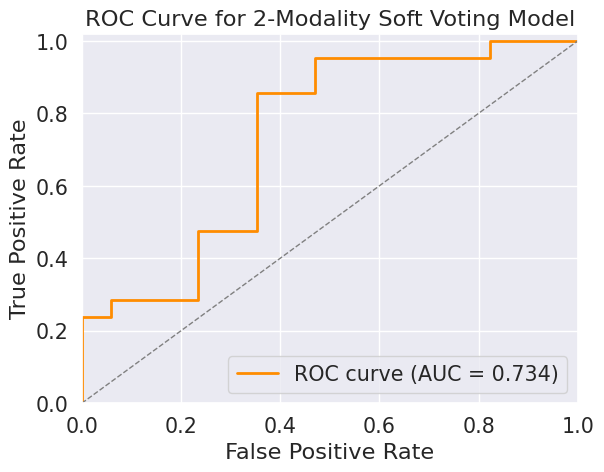

In [137]:
from dython.model_utils import metric_graph
import seaborn as sns

vote1v0 = df4.total_votes_1 - df4.total_votes_0 # number of votes for class 1 minus number of votes for class 0

sns.set(style="darkgrid", font_scale=1.35)
metric_graph(actual, vote1v0, metric='roc', fmt='.3f', title='ROC Curve for 2-Modality Soft Voting Model',
             legend='lower right', eopt=False)
plt.show()

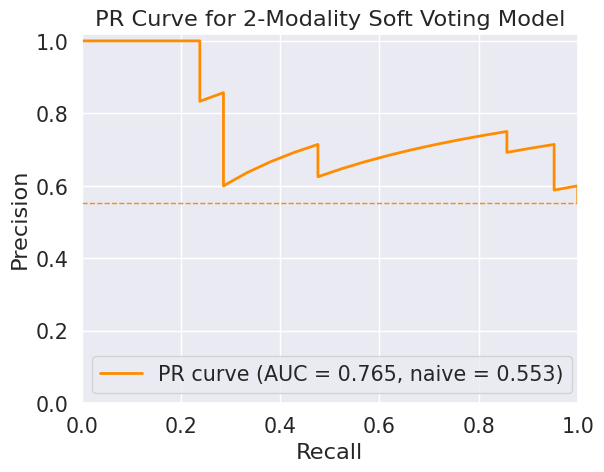

In [138]:
metric_graph(actual, vote1v0, metric='pr', fmt='.3f', title='PR Curve for 2-Modality Soft Voting Model',
             legend='lower left', eopt=False) # naive precision/AUC is proportion of bipolar in data.
# precision=PPV, recall=sensitivity
plt.show()

In [139]:
p = metric_graph(actual, vote1v0, metric='pr', plot=False)['0']['eopt']['y']
r = metric_graph(actual, vote1v0, metric='pr', plot=False)['0']['eopt']['x']
F1 = 2*p*r/(p+r)
F1 # F1 score (harmonic mean of precision and recall):

0.7999999999999999

#### Only connectivity and diffusion

In [140]:
df4 = df2.copy()
df4['total_votes_0'] = df4['con_lr_0'] - df4['dif_svm']
df4['total_votes_1'] = df4['con_lr_1'] + df4['dif_svm']

In [141]:
df4['vote_bipolar'] = np.nan
for i in range(0,38):
    if df4.loc[i, 'total_votes_0'] > df4.loc[i, 'total_votes_1']:
        df4.loc[i, 'vote_bipolar'] = 0
    elif df4.loc[i, 'total_votes_1'] > df4.loc[i, 'total_votes_0']:
        df4.loc[i, 'vote_bipolar'] = 1
df4['misclassified'] = np.nan
for i in range(0,38):
    if df4.loc[i, 'vote_bipolar'] != df4.loc[i, 'bipolar']  and np.isnan(df4.loc[i, 'vote_bipolar']) == False:
        df4.loc[i, 'misclassified'] = 1
    elif df4.loc[i, 'vote_bipolar'] == df4.loc[i, 'bipolar']:
        df4.loc[i, 'misclassified'] = 0
np.nanmean(df4.misclassified) # misclassification rate

0.21052631578947367

In [142]:
predicted = np.array(df4.vote_bipolar)
actual = np.array(df4.bipolar)
results = np.empty(len(predicted)).tolist()
for i in range(0, len(predicted)):
    if predicted[i]==1 and actual[i]==1:
        results[i] = 'tp'
    if predicted[i]==0 and actual[i]==1:
        results[i] = 'fn'
    if predicted[i]==1 and actual[i]==0:
        results[i] = 'fp'
    if predicted[i]==0 and actual[i]==0:
        results[i] = 'tn'
tp = results.count('tp')
fp = results.count('fp')
tn = results.count('tn')
fn = results.count('fn')
print('Sensitivity: ' + str(tp/(tp+fn)))
print('Specificity: ' + str(tn/(tn+fp)))
print('PPV: ' + str(tp/(tp+fp)))
print('NPV: ' + str(tn/(tn+fn)))

Sensitivity: 0.8095238095238095
Specificity: 0.7647058823529411
PPV: 0.8095238095238095
NPV: 0.7647058823529411


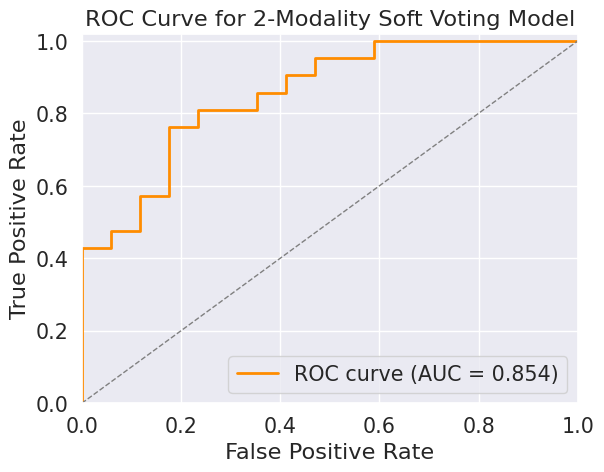

In [143]:
from dython.model_utils import metric_graph
import seaborn as sns

vote1v0 = df4.total_votes_1 - df4.total_votes_0 # number of votes for class 1 minus number of votes for class 0

sns.set(style="darkgrid", font_scale=1.35)
metric_graph(actual, vote1v0, metric='roc', fmt='.3f', title='ROC Curve for 2-Modality Soft Voting Model',
             legend='lower right', eopt=False)
plt.show()

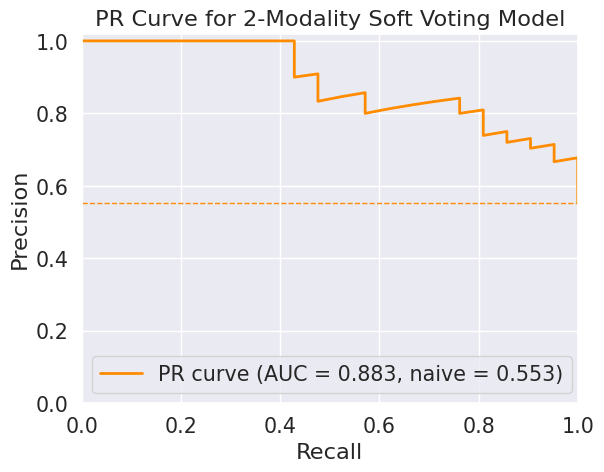

In [144]:
metric_graph(actual, vote1v0, metric='pr', fmt='.3f', title='PR Curve for 2-Modality Soft Voting Model',
             legend='lower left', eopt=False) # naive precision/AUC is proportion of bipolar in data.
# precision=PPV, recall=sensitivity
plt.show()

In [145]:
p = metric_graph(actual, vote1v0, metric='pr', plot=False)['0']['eopt']['y']
r = metric_graph(actual, vote1v0, metric='pr', plot=False)['0']['eopt']['x']
F1 = 2*p*r/(p+r)
F1 # F1 score (harmonic mean of precision and recall):

0.8095238095238095

# Bootstrapping

In [146]:
import random
random.seed(0)
samples = 38 # how many samples in each bootstrapped dataset?
num_boot = 10000 # how many bootstrap datasets do you want?
boot_datasets = {}
for i in range(0, num_boot):
    indices = []
    for j in range(0, samples):
        indices.append(random.randint(0, 37))
        boot_datasets[i] = df1.iloc[indices,:]

In [147]:
from dython.model_utils import metric_graph
import seaborn as sns
accuracies = []
sensitivities = []
specificities = []
PPVs = []
NPVs = []
ROC_AUCs = []
PR_AUCs = []
F1s = []
for i in range(0, num_boot):
    accuracies.append(np.nanmean(boot_datasets[i].misclassified))
    predicted = np.array(boot_datasets[i].vote)
    actual = np.array(boot_datasets[i].bipolar)
    results = np.empty(len(predicted)).tolist()
    for j in range(0, len(predicted)):
        if predicted[j]==1 and actual[j]==1:
            results[j] = 'tp'
        if predicted[j]==0 and actual[j]==1:
            results[j] = 'fn'
        if predicted[j]==1 and actual[j]==0:
            results[j] = 'fp'
        if predicted[j]==0 and actual[j]==0:
            results[j] = 'tn'
    tp = results.count('tp')
    fp = results.count('fp')
    tn = results.count('tn')
    fn = results.count('fn')
    sensitivities.append(tp/(tp+fn))
    r = tp/(tp+fn)
    specificities.append(tn/(tn+fp))
    PPVs.append(tp/(tp+fp))
    p = tp/(tp+fp)
    NPVs.append(tn/(tn+fn))
    F1s.append(2*p*r/(p+r))
    vote1v0 = boot_datasets[i].vol+boot_datasets[i].con+boot_datasets[i].dif
    ROC_AUCs.append(metric_graph(actual, vote1v0, metric='roc', fmt='.3f', title='',
             legend='lower right', eopt=False, plot=False)['0']['auc']['val'])
    PR_AUCs.append(metric_graph(actual, vote1v0, metric='pr', fmt='.3f', title='',
             legend='lower right', eopt=False, plot=False)['0']['auc']['val'])

In [148]:
accuracies = np.ones(num_boot) - accuracies # the "accuracies" in the previous cell are actually 1-accuracy
(np.mean(accuracies), np.mean(sensitivities), np.mean(specificities), np.mean(PPVs), np.mean(NPVs),
 np.mean(F1s), np.mean(ROC_AUCs), np.mean(PR_AUCs))

(0.8953763157894736,
 0.9051134065181479,
 0.8834863637225134,
 0.90551635387318,
 0.8828259093763244,
 0.9031588295353551,
 0.9415061998543836,
 0.9586155816036935)

In [149]:
# 95% bootstrap confidence intervals:
(np.quantile(accuracies, [0.025, 0.975]), np.quantile(sensitivities, [0.025, 0.975]), np.quantile(specificities, [0.025, 0.975]),
 np.quantile(PPVs, [0.025, 0.975]), np.quantile(NPVs, [0.025, 0.975]), np.quantile(F1s, [0.025, 0.975]),
 np.quantile(ROC_AUCs, [0.025, 0.975]), np.quantile(PR_AUCs, [0.025, 0.975]))

(array([0.78947368, 0.97368421]),
 array([0.76, 1.  ]),
 array([0.70588235, 1.        ]),
 array([0.76190476, 1.        ]),
 array([0.70588235, 1.        ]),
 array([0.79069767, 0.97874512]),
 array([0.86834734, 0.99130435]),
 array([0.89642799, 0.99537037]))